In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('unsupervised_data.csv')
data.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,1,-21.904591,-22.659091,12.805995,-46.631935,-34.347081,-21.989738
1,2,-28.662385,68.757081,31.761821,3.982259,-62.876866,-61.838563
2,3,-62.551204,60.909235,8.112918,24.110050,-64.372336,70.681940
3,4,14.428024,-48.326045,-65.576518,76.027549,69.966852,48.023953
4,5,9.780285,-55.643172,-72.737299,74.180123,67.873327,41.128015


In [3]:
x = data.iloc[:,1:]
x = (x - x.mean())/(x.std())
print(x.head())
x = x.values
print(x.shape)

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6
0  -0.351394  -0.375421   0.548404  -1.147147  -0.240468  -0.399638
1  -0.543616   1.350495   1.018814   0.078809  -0.845911  -1.236549
2  -1.507571   1.202329   0.431940   0.566336  -0.877647   1.546665
3   0.682074  -0.860007  -1.396747   1.823860   1.973223   1.070799
4   0.549871  -0.998153  -1.574450   1.779113   1.928796   0.925969
(40000, 6)


In [4]:
def initial_centroid(x,k):
    randomidx = np.random.permutation(x.shape[0])
    centroids = x[randomidx[:k]]
    return centroids 


In [5]:
def close_centroids(x,centroids):
    k = centroids.shape[0]
    idx = np.zeros(x.shape[0],dtype = int)
 
    X_expanded = x[:, np.newaxis, :]      
    centroids_expanded = centroids[np.newaxis, :, :]  


    distances = np.sqrt(np.sum((X_expanded - centroids_expanded)**2, axis=-1)) 
    idx = np.argmin(distances,axis = 1)
    
    return idx

In [6]:
def compute_centroids(x,idx,k):
    m,n = x.shape
    centroids = np.zeros((k,n))
    for i in range(k):
        centroids[i] = np.mean(x[idx==i],axis=0)
    return centroids

In [7]:
def k_means(x,initial_centroids,max_itera = 10):
    k = initial_centroids.shape[0]
    m,n = x.shape
    centroids = np.copy(initial_centroids)
    previous_centroids = centroids
    idx = np.zeros(m)
   
    for i in range(max_itera):
        print("k_means iteration %d/%d" % (i,max_itera -1))
        idx = close_centroids(x,centroids)
        
        centroids = compute_centroids(x,idx,k)
    return centroids, idx


In [8]:
def calculate_wcss(data, centroids, labels):
    wcss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[labels == i]  
        if cluster_points.shape[0] == 0: 
            continue
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

In [9]:
wcss_history = []

for k in range(170,190):
    
    i_centroids = initial_centroid(x,k)
    centroids,labels = k_means(x,i_centroids,max_itera = 50)
    wcss = calculate_wcss(x, centroids, labels)
    wcss_history.append(wcss)
    print("WCSS:", wcss)
    if (k == 170):
        wcss_min = wcss
    else :
        if (wcss < wcss_min):
            wcss_min = wcss
            z = k
            centroids_k = centroids 
            labels_k = labels

print(f"minimum {wcss_min} at k: {z}")


k_means iteration 0/49
k_means iteration 1/49
k_means iteration 2/49
k_means iteration 3/49
k_means iteration 4/49
k_means iteration 5/49
k_means iteration 6/49
k_means iteration 7/49
k_means iteration 8/49
k_means iteration 9/49
k_means iteration 10/49
k_means iteration 11/49
k_means iteration 12/49
k_means iteration 13/49
k_means iteration 14/49
k_means iteration 15/49
k_means iteration 16/49
k_means iteration 17/49
k_means iteration 18/49
k_means iteration 19/49
k_means iteration 20/49
k_means iteration 21/49
k_means iteration 22/49
k_means iteration 23/49
k_means iteration 24/49
k_means iteration 25/49
k_means iteration 26/49
k_means iteration 27/49
k_means iteration 28/49
k_means iteration 29/49
k_means iteration 30/49
k_means iteration 31/49
k_means iteration 32/49
k_means iteration 33/49
k_means iteration 34/49
k_means iteration 35/49
k_means iteration 36/49
k_means iteration 37/49
k_means iteration 38/49
k_means iteration 39/49
k_means iteration 40/49
k_means iteration 41/49
k_

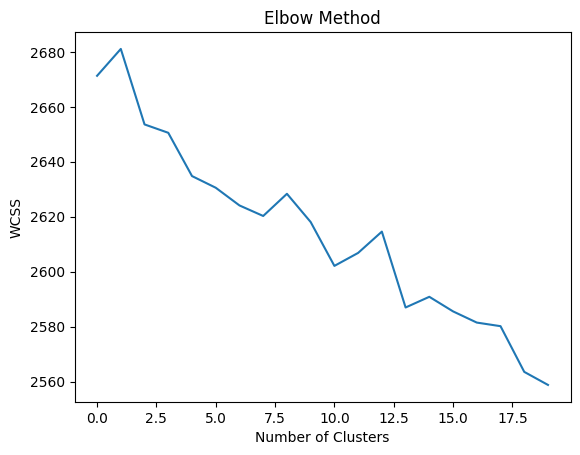

In [10]:
plt.plot(wcss_history)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
def compactness(data, labels, centroids):
    total_compactness = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[labels == i]
        total_compactness += np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
    return total_compactness

def separation(centroids):
    distances = []
    for i, centroid_a in enumerate(centroids):
        for j, centroid_b in enumerate(centroids):
            if i != j:
                distances.append(np.linalg.norm(centroid_a - centroid_b))
    return np.mean(distances)


compact = compactness(x, labels_k, centroids)
print(compact)
sep = separation(centroids_k)
print(sep)

45.8566515242751
3.2068829753445747


In [ ]:
def silhouette_score(x, idx, centroids):
    m = x.shape[0]
    a = np.zeros(m)  
    b = np.zeros(m)  

    for i in range(m):
        own_cluster = idx[i]
        other_clusters = [j for j in range(len(centroids)) if j != own_cluster]
        
        same_cluster_points = x[idx == own_cluster]
        if same_cluster_points.shape[0] > 1:
            a[i] = np.mean(np.linalg.norm(x[i] - same_cluster_points, axis=1))
        
        separation_distances = [
            np.mean(np.linalg.norm(x[i] - x[idx == other], axis=1))
            for other in other_clusters
        ]
        b[i] = min(separation_distances) if separation_distances else 0

    silhouette_scores = (b - a) / np.maximum(a, b)
    silhouette_scores = np.nan_to_num(silhouette_scores)  
    return np.mean(silhouette_scores)
sl_score = silhouette_score(x,labels_k,centroids_k)
print(sl_score)